In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
from generate_keypair import generate_key_pairs
from prime_number_generation import mod_exp
sys.setrecursionlimit(8000)

In [6]:
def encrypt(message: int, N: int, e: int) -> int:
    return mod_exp(message, e, N)

def decrypt(ciphertext: int, N: int, d: int) -> int:
    return mod_exp(ciphertext, d, N)

In [8]:
def measure_encryption_time(sizes:list[int], message: int):
    en_results = []
    de_results = []
    for size in sizes:
        N, e, d = generate_key_pairs(size)
        start_time = time.perf_counter()
        ciphertext = encrypt(message, N, e)
        end_time = time.perf_counter()
        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        en_results.append(elapsed_time)

        start_time = time.perf_counter()
        unencrypted_message = decrypt(ciphertext, N, d)
        end_time = time.perf_counter()
        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        de_results.append(elapsed_time)
        assert message == unencrypted_message, "Decryption did not return the original message"

    return en_results, de_results

In [9]:
sizes = [64, 128, 256, 512, 1024, 2048]
message = 42
en_times, de_times = measure_encryption_time(sizes, message)

In [37]:
x = np.array(sizes, dtype=np.int64)
y_en = np.array(en_times, dtype=np.float64)
y_de = np.array(de_times, dtype=np.float64)

In [42]:
linear = x
quadratic = x**2
cubic = x**3
log = np.log2(x)

en_constants_logn = y_en / log
en_avg_constant_logn = np.mean(en_constants_logn)

en_constants_linear = y_en / linear
en_avg_constant_linear = np.mean(en_constants_linear)

en_constants_quadratic = y_en / quadratic
en_avg_constant_quadratic = np.mean(en_constants_quadratic)


de_constants_logn = y_de / log
de_avg_constant_logn = np.mean(de_constants_logn)

de_constants_linear = y_de / linear
de_avg_constant_linear = np.mean(de_constants_linear)

de_constants_quadratic = y_de / quadratic
de_avg_constant_quadratic = np.mean(de_constants_quadratic)

de_constants_cubic = y_de / cubic
de_avg_constant_cubic = np.mean(de_constants_cubic)

print(f"results for encryption times (ms): {y_en}")
print(f"average encryption constant for O(log n): {en_avg_constant_logn}")
print(f"average encryption constant for O(n): {en_avg_constant_linear}")
print(f"average encryption constant for O(n^2): {en_avg_constant_quadratic}\n")

print(f"results for decryption times (ms): {y_de}")
print(f"average decryption constant for O(log n): {de_avg_constant_logn}")
print(f"average decryption constant for O(n): {de_avg_constant_linear}")
print(f"average decryption constant for O(n^2): {de_avg_constant_quadratic}")
print(f"average decryption constant for O(n^3): {de_avg_constant_cubic}")

results for encryption times (ms): [0.00330003 0.00330003 0.00380003 0.00359991 0.00350003 0.00610005]
average encryption constant for O(log n): 0.0004668304031560696
average encryption constant for O(n): 1.7602635201304413e-05
average encryption constant for O(n^2): 1.8059940117461556e-07

results for decryption times (ms): [3.03700101e-01 1.79800089e-01 1.26669998e+00 3.88600002e+00
 2.78275000e+01 3.32849100e+02]
average decryption constant for O(log n): 5.618029463459301
average decryption constant for O(n): 0.03473119340924313
average decryption constant for O(n^2): 3.75279436507873e-05
average decryption constant for O(n^3): 2.3556309660321354e-07


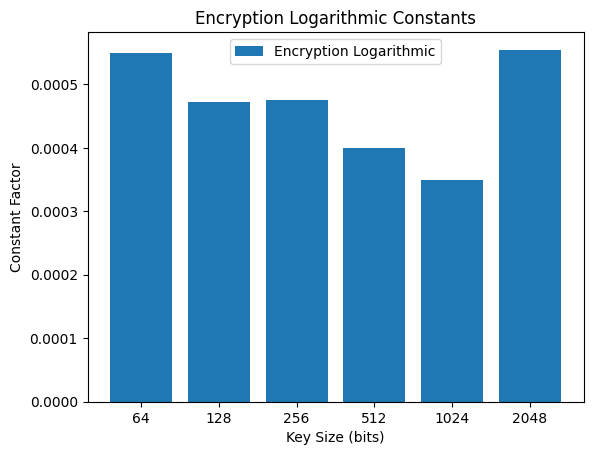

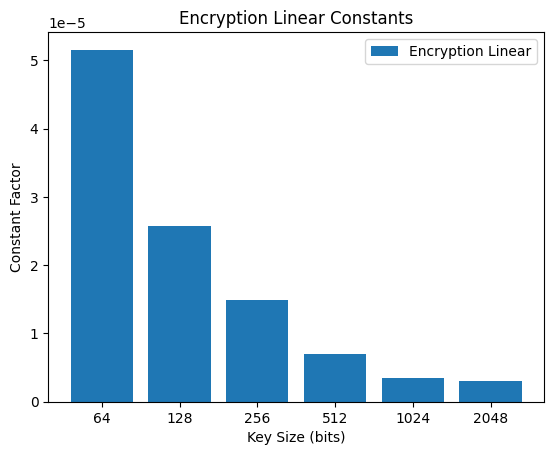

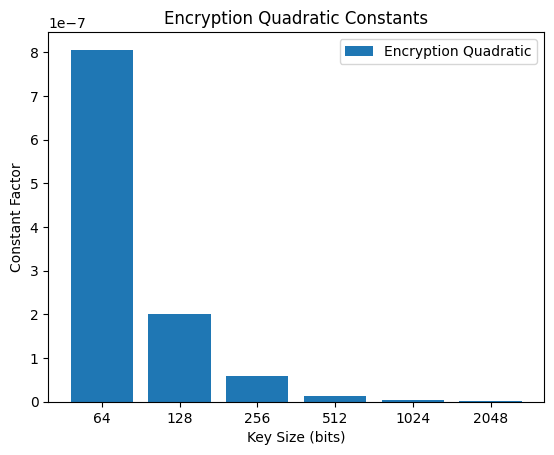

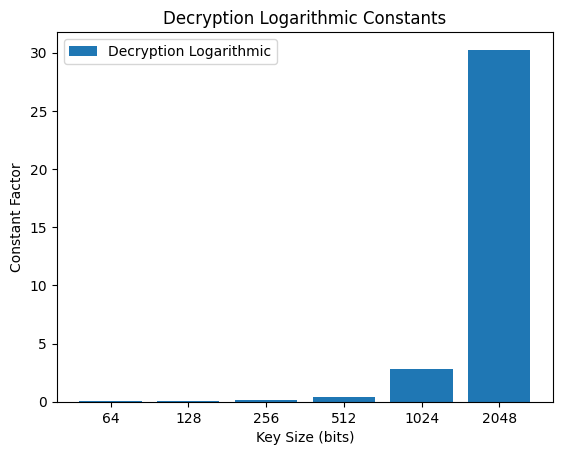

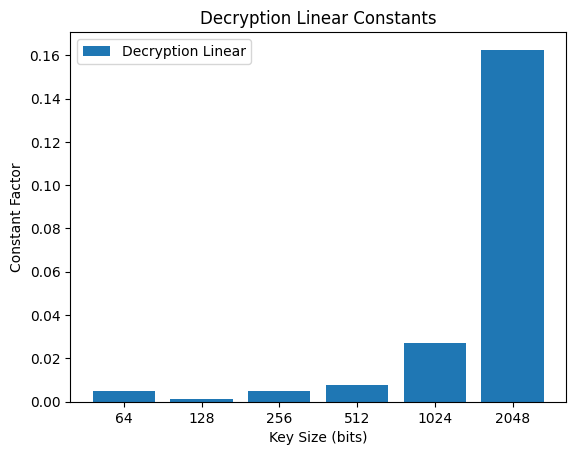

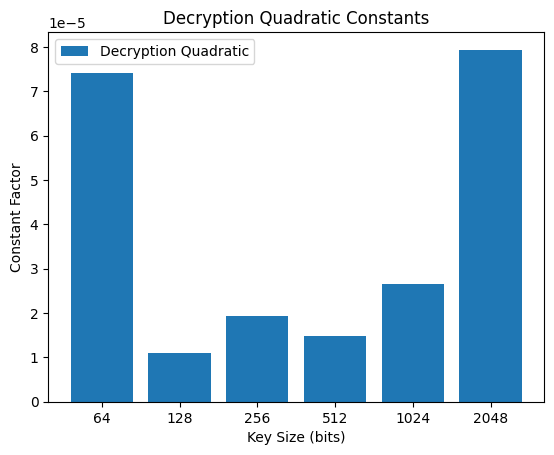

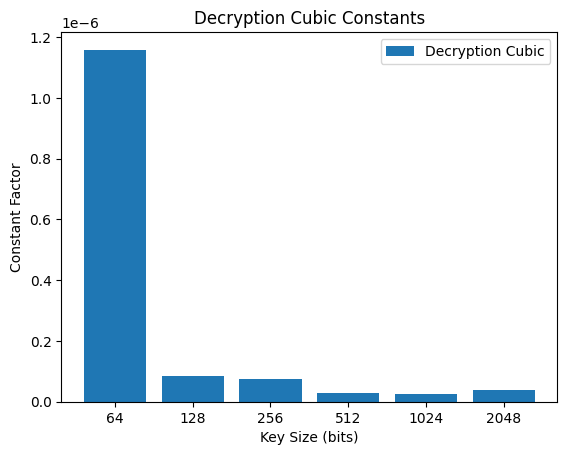

In [43]:
x_bins = [i for i in range(len(sizes))]

plt.bar(x_bins, en_constants_logn, label='Encryption Logarithmic')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Encryption Logarithmic Constants')
plt.show()

plt.clf()
plt.bar(x_bins, en_constants_linear, label='Encryption Linear')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Encryption Linear Constants')
plt.show()

plt.clf()
plt.bar(x_bins, en_constants_quadratic, label='Encryption Quadratic')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Encryption Quadratic Constants')
plt.show()

plt.clf()
plt.bar(x_bins, de_constants_logn, label='Decryption Logarithmic')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Decryption Logarithmic Constants')
plt.show()

plt.clf()
plt.bar(x_bins, de_constants_linear, label='Decryption Linear')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Decryption Linear Constants')
plt.show()

plt.clf()
plt.bar(x_bins, de_constants_quadratic, label='Decryption Quadratic')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Decryption Quadratic Constants')
plt.show()

plt.clf()
plt.bar(x_bins, de_constants_cubic, label='Decryption Cubic')
plt.xticks(x_bins, sizes)
plt.xlabel('Key Size (bits)')
plt.ylabel('Constant Factor')
plt.legend()
plt.title('Decryption Cubic Constants')
plt.show()

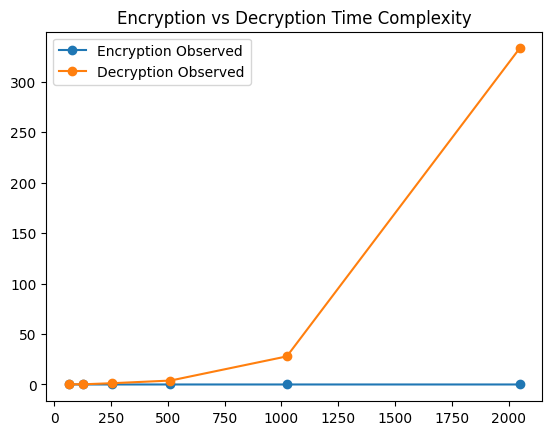

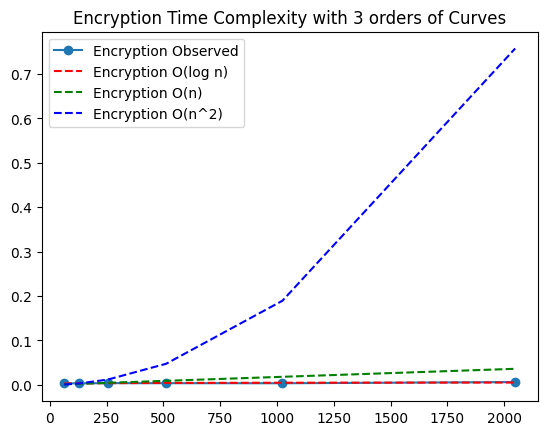

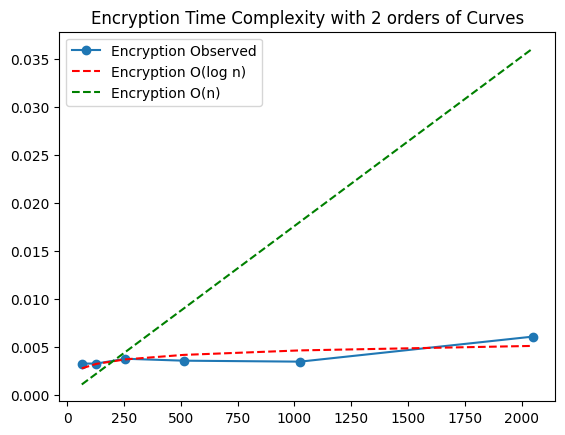

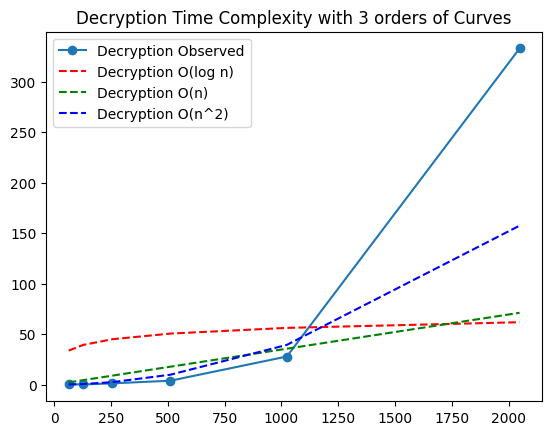

In [44]:
plt.clf()
plt.plot(x, y_en, 'o-', label='Encryption Observed')
plt.plot(x, y_de, 'o-', label='Decryption Observed')
plt.legend()
plt.title('Encryption vs Decryption Time Complexity')
plt.show()

plt.clf()
plt.plot(x, y_en, 'o-', label='Encryption Observed')
plt.plot(x, en_avg_constant_logn * log, 'r--', label='Encryption O(log n)')
plt.plot(x, en_avg_constant_linear * linear, 'g--', label='Encryption O(n)')
plt.plot(x, en_avg_constant_quadratic * quadratic, 'b--', label='Encryption O(n^2)')
plt.legend()
plt.title('Encryption Time Complexity with 3 orders of Curves')
plt.show()

plt.clf()
plt.plot(x, y_en, 'o-', label='Encryption Observed')
plt.plot(x, en_avg_constant_logn * log, 'r--', label='Encryption O(log n)')
plt.plot(x, en_avg_constant_linear * linear, 'g--', label='Encryption O(n)')
plt.legend()
plt.title('Encryption Time Complexity with 2 orders of Curves')
plt.show()

plt.clf()
plt.plot(x, y_de, 'o-', label='Decryption Observed')
plt.plot(x, de_avg_constant_logn * log, 'r--', label='Decryption O(log n)')
plt.plot(x, de_avg_constant_linear * linear, 'g--', label='Decryption O(n)')
plt.plot(x, de_avg_constant_quadratic * quadratic, 'b--', label='Decryption O(n^2)')
plt.legend()
plt.title('Decryption Time Complexity with 3 orders of Curves')
plt.show()